# 05-01 Cosine Similarity (코사인 유사도)


출처:https://wikidocs.net/24603

### 문장이나 문서의 유사도를 구하는 작업

사람들이 인식하는 문서의 유사도는 주로 문서들 간에 
동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존

* 1) (DTM, Word2Vec 등), 각 문서의 단어들을 어떤 방법으로 수치화하여 표현


* 2) (유클리드 거리, 코사인 유사도 등) 문서 간의 단어들의 차이를 어떤 방법으로 계산


-------------------------------------------------------------------------

## 05-01 코사인 유사도(Cosine Similarity)

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미

두 벡터의 방향이 완전히 동일 -> 1 

90°의 각 -> 0, 

180°로 반대의 방향 ->  -1


결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 
값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 

In [1]:
from IPython.display import Image

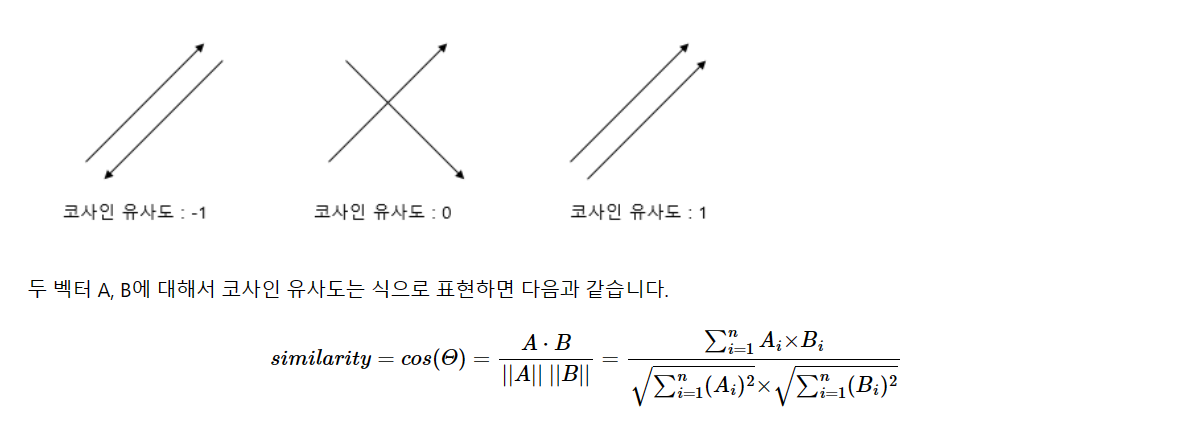

In [3]:
Image("image/Cosine Similarity.png")

문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 됩니다

####  바나나 사과 저는 좋아요

# 문서1    0     1     1    1

# 문서2    1     0     1    1

# 문서3    2     0     2    2

In [4]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다 

문서2와 문서3의 코사인 유사도가 1이 나온다

앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급

//

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다.

다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 

이것이 시사하는 점은 무엇일까요? 예를 들어보겠습니다. 

문서 A와 B가 동일한 주제.  문서 C는 다른 주제의 문서라고 해봅시다. 

-> 문서 A=B   C

그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 

-> 문서 A와 c의 문서길이 비슷

문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하겠습니다. 

-> 문서 A x 2 = 문서 B의 길이. 

-> 문서 A와C의 길이가 비슷 x 2배 -> 문서 B의 길이


---


이런 경우 유클리드 거리로 유사도를 연산하면 

문서 A가 > 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생할 수 있습니다. 



###  -> 주제가 같은 것 보다, 문서의 길이가 같은게...유사도가 더 높게 측정되는 오류 (유클리드 거리)


-> 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 
이런 경우 코사인 유사도가 해결책이 될 수 있습니다. 

코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 
코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.


## 2. 유사도를 이용한 추천 시스템 구현하기


캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천 시스템

TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반해서 영화를 추천하는 추천 시스템을 만들 수 있습니다.



In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


여기서 코사인 유사도에 사용할 데이터는 영화 제목에 해당하는 title 열과 줄거리에 해당하는 overview 열입니다. 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화를 찾아서 추천하는 시스템



In [6]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [7]:
# # 만약 훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면 위와 같이 데이터를 줄여서 재저장할 수 있습니다. 
# 여기서는 상위 20,000개의 샘플만 사용하겠습니다.
# TF-IDF를 연산할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다. 
# TF-IDF의 대상이 되는 data의 overview 열에 결측값에 해당하는 Null 값이 있는지 확인합니다.

# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [8]:
# 135개의 Null 값이 있다고 합니다. 
# 이 경우 결측값을 가진 행을 제거하는 pandas의 dropna()나 결측값이 있던 행에 특정값으로 채워넣는 pandas의 fillna()를 사용할 수 있습니다. 
# 괄호 안에 Null 대신 넣고자하는 값을 넣으면 되는데, 
# 여기서는 빈 값(empty value)으로 대체하였습니다.

# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [9]:
# Null 값을 빈 값으로 대체하였습니다. 
# overview열에 대해서 TF-IDF 행렬을 구한 후 행렬의 크기를 출력해봅시다.

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


In [10]:
# TF-IDF 행렬의 크기는 20,000의 행을 가지고 47,847의 열을 가지는 행렬입니다. 
#다시 말해 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미합니다. 
# 또는 47,847차원의 문서 벡터가 20,000개가 존재한다고도 표현할 수 있을 겁니다. 
# 이제 20,000개의 문서 벡터에 대해서 상호 간의 코사인 유사도를 구합니다.

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [14]:
# 코사인 유사도 연산 결과로는 20,000행 20,000열의 행렬을 얻습니다. 
# 이는 20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬입니다.
# 모든 20,000개 영화의 상호 유사도가 기록되어져 있습니다. 
# 이제 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들어둡니다

title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)



4


In [15]:
# 선택한 영화의 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [16]:
# 영화 다크 나이트 라이즈와 overview가 유사한 영화들을 찾아보겠습니다.

get_recommendations('The Dark Knight Rises')


12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object